In [1]:
import pandas as pd
import numpy as np
import numpy.random as random

import matplotlib.pyplot as plt
%matplotlib inline

import json

vardict = json.load(open("variables.json"))
def add_entry(vardict, name, element):
    vardict[name]= element
    return vardict

In [3]:

# initial levels (N)
N = 2000
log_level_0 = pd.DataFrame(np.zeros(N), columns = ['level_0']) 
# this represent eg. sales in logs

# time steps (T - 1) timesteps for an N x T dataframe
T = 400
sigma = .02
eps = pd.DataFrame(np.random.normal(0, 1, (N, T - 1)), columns = range(1, T))
log_shocks = np.log10(1 + sigma*eps)

data = pd.DataFrame(pd.concat([log_level_0, log_shocks], axis = 1))
data.columns = range(T)
log_levels = data.cumsum(axis = 1)

# S
levels= np.power(10, log_levels)

# levels S fulfill: 
#     (levels[2]/levels[1])-1 = eps[1]

In [4]:
# eps.mean().hist(bins = 50)
# (sigma*eps).std(1).mean()

In [5]:
# debug
# levels.diff(axis = 1).round(5) == (levels.shift(1, axis = 1)*eps).round(5)

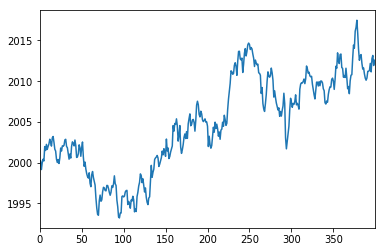

In [6]:
# # Aggregate Y
levels.sum().plot()
plt.show()

In [7]:
# standard deviation of GDP growth

# GDP
Y_levels = levels.sum()

# This is DY(t+1)/Y(t)
lhs = (Y_levels.diff() / Y_levels.shift())#.std()
# This is 
mhs = levels.diff(axis = 1).sum()/levels.sum().shift()

rhs = (sigma * levels.shift(1, axis = 1)*eps).sum()/levels.sum().shift()

rhs2 = (sigma * (levels / levels.sum()).shift(1, axis = 1)*eps).sum()

# (levels / levels.sum()).shift(1, axis = 1) is Sit/Yt. The shift is because otherwise we sould be shifting eps.

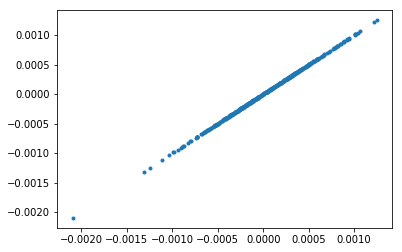

In [8]:
plt.plot(lhs, rhs2, marker = '.', lw = 0)

In [9]:
### Because lhs = rhs2

# Time series of a total
# (Y_levels.diff() / Y_levels.shift())

## Collection of time series that add up to the same thing.
# (sigma * (levels / levels.sum()).shift(1, axis = 1)*eps)#.sum()

# If they add up to this thing, and if they are uncorrelated, the variance of lhs should be sum of variances of rhs2

In [10]:
(Y_levels.diff() / Y_levels.shift()).var()

2.0975910425599548e-07

In [11]:
(sigma * (levels / levels.sum()).shift(1, axis = 1)*eps).var(1).sum()

2.1669918073186788e-07

In [14]:
(sigma * (levels / levels.sum()).shift(1, axis = 1)*eps).T.cov().sum().sum()

2.097591042560071e-07

In [23]:
# data = pd.concat([lhs, mhs, rhs, rhs2], axis = 1)

# import seaborn as sns
# sns.pairplot(data)
# # plt.ylim(-1e7, 1e7)
# plt.show()

### Levy distribution

In [130]:
# Central limit theorem for infinite-variance variables
from scipy.stats import gennorm

s = .5
n = 100000
# distrib = gennorm.rvs(1/2, size = n) * (s / 10.925)
distrib = np.random.laplace(0, s, n)/np.sqrt(2)

result = []
for x in np.round(np.arange(0, 5, .25), 2):
#     print(sum(distrib > x)/sum(abs(distrib) > x))
    result += [[x, sum(abs(distrib) > x)/len(distrib)]]

df = pd.DataFrame(np.array(result), columns = ['x', 'xzL'])


In [ ]:
# z = 1
# x0 = 0.01
# df['xz'] = np.power(df.x/x0, -z)
# # df['xz'] = 1e4/(df.x**3)*np.power(df.x, -z)

# fig, ax = plt.subplots(1, figsize = (7, 5))
# df.plot('x', 'xzL', marker = '.', ax = ax)
# df.plot('x', 'xz', marker = '.', ax = ax)
# ax.set_yscale('log')
# plt.show()



In [173]:
s = .5
n = 100000

result = []
for n in np.round(np.arange(1, 7, .025), 1):
    n = int(round(np.power(10, n)))
    distrib = np.random.laplace(0, s, n)/np.sqrt(2)
#     distrib = gennorm.rvs(1/2, size = n) * (s / 10.925)

    s_n = distrib.sum()

    # A_n is related to the maximum. It is the smallest x for which we find less than one case, given our n.
    # a_n ~~ df.loc[df['xzL'] < 1/n].head(1)
    a_n = abs(distrib).max()

    # b_n is the expectation of all those who are below this threshold, i.e. b -> 0 if the dist is symmetric
#     b_n = n*np.mean(distrib) this is the actual value, not the 'E'xpectation
    b_n = 0

    result += [[n, s_n, a_n]]
df = pd.DataFrame(np.array(result), columns = ['n', 's_n', 'a_n'])

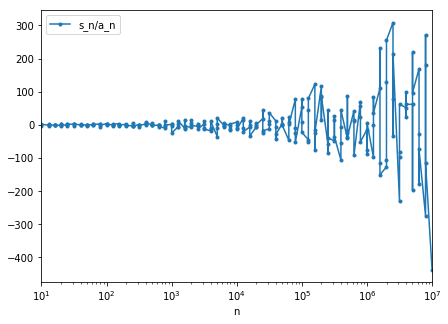

In [174]:
z = 5 # 5 for subbot, 10 for laplace

df['a_n_est'] = np.power(df.n, 1/z)
df['s_n/a_n'] = df.s_n/df.a_n

fig, ax = plt.subplots(1, figsize = (7, 5))
# df.plot('n', 'a_n', marker = '.', ax = ax)
# df.plot('n', 'a_n_est', marker = '.', ax = ax)
# df.plot('n', 's_n', marker = '.', ax = ax)
df.plot('n', 's_n/a_n', marker = '.', ax = ax)

ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()

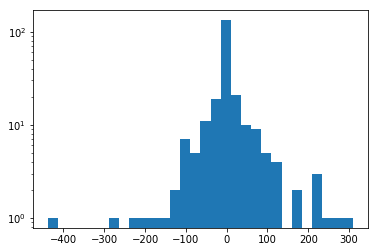

In [180]:
#Supposedly Levy distribution ~ power law tail with exponent Zeta
plt.hist(df['s_n/a_n'], 30)
plt.yscale('log')
plt.show()

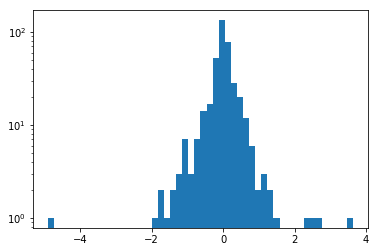

In [20]:
plt.hist(g_rates[1500], 50)
plt.yscale('log')
plt.show()

### Test of the Herfindahl expression

In [ ]:
# When we have a total composed by parts, if the time series are independent we should be able to express agg variance
# as sum of variance of the parts divided by their weight squared. But... does this break down sometimes? Eg with too many agents?

In [444]:
# initial levels (N)
N = 20000
log_level_0 = pd.DataFrame(np.zeros(N), columns = ['level_0']) 
# this represent eg. sales in logs

# time steps (T - 1) timesteps for an N x T dataframe
T = 100
sigma = .02

eps = pd.DataFrame(np.random.normal(0, 1, (N, T - 1)), columns = range(1, T))

# USING LOG-SHOCKS
# log_shocks = np.log10(1 + sigma*eps)
# data = pd.DataFrame(pd.concat([log_level_0, log_shocks], axis = 1))
# data.columns = range(T)
# log_levels = data.cumsum(axis = 1)
# # S
# levels= np.power(10, log_levels)

# LEAVING THE SHOCKS LINEAR
shocks = 1 + sigma*eps
lin_level_0 = pd.DataFrame(np.ones(N), columns = ['level_0']) 
data = pd.DataFrame(pd.concat([lin_level_0, shocks], axis = 1))
levels= data.cumprod(axis = 1)

In [406]:
# Test log vs linear shocks approximation when sigma is very small

# # These are the shocks as in eq 1.
# eps_1 = levels.diff(axis = 1).dropna(axis = 1)/levels.iloc[:, :-1].values

# plt.hist((sigma*eps).values.flatten(), 150, alpha = .25)
# # plt.hist(np.log10(1 + sigma*eps).values.flatten(), 150, alpha = .25)
# plt.hist(eps_1.values.flatten(), 150, alpha = .25)
# plt.show()

1.829055173738699e-08

In [488]:
# sum((levels.diff(axis = 1).dropna(axis = 1)/levels.iloc[:, :-1].values).var(1) * levels.sum(1)/levels.sum().sum())

np.log10(1)

0.0

10


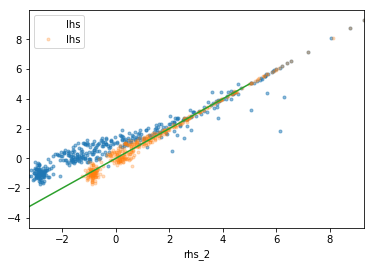

100


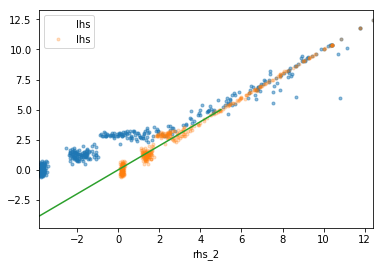

1000


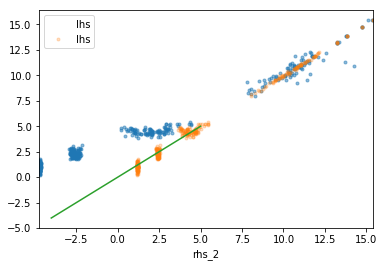

In [563]:
# initial levels (N)
N = 20000
log_level_0 = pd.DataFrame(np.zeros(N), columns = ['level_0']) 
# this represent eg. sales in logs

# time steps (T - 1) timesteps for an N x T dataframe
T = 100

sigma = .02


for n in [10, 100, 1000]:
    print(n)
    lhs = []
    rhs = []
    rhs_2 = []
    for sigma in [0.03, 0.1, 0.3, 1]:

        eps = pd.DataFrame(np.random.normal(0, 1, (N, T - 1)), columns = range(1, T))

        # USING LOG-SHOCKS
        # log_shocks = np.log10(1 + sigma*eps)
        # data = pd.DataFrame(pd.concat([log_level_0, log_shocks], axis = 1))
        # data.columns = range(T)
        # log_levels = data.cumsum(axis = 1)
        # # S
        # levels= np.power(10, log_levels)

        # LEAVING THE SHOCKS LINEAR
        shocks = 1 + sigma*eps
        lin_level_0 = pd.DataFrame(np.ones(N), columns = ['level_0']) 
        data = pd.DataFrame(pd.concat([lin_level_0, shocks], axis = 1))
        levels= data.cumprod(axis = 1)


        M = 100
        for m in range(M):
            sample = levels.sample(n)
            lhs += [sample.sum().var()]
            rhs += [sum(sample.var(1) * (sample.sum(1)/sample.sum().sum())**2)]
    #         lhs += [sample.sum().diff().var()]
    #         rhs += [sum(sample.diff(axis = 1).var(1) * (sample.sum(1)/sample.sum().sum())**2)]
            rhs_2 += [sum(sample.var(1))]
        
# #         Equation 3 of GABAIX.
#             lhs += [(sample.sum().diff().dropna()/sample.sum().iloc[:-1].values).var()]
#             rhs += [(sigma)**2*sum(sample.sum(1)/sample.sum().sum())]
#             rhs_2 += [sum((sample.diff(axis = 1).dropna(axis = 1)/sample.iloc[:, :-1].values).var(1)*sample.sum(1)/sample.sum().sum())]


#         # Equation 3 of GABAIX changing the rhs for the mere sum of variances.
#             lhs += [(sample.sum().diff().dropna()/sample.sum().iloc[:-1].values).var()]
#             rhs += [1]
#             rhs_2 += [sum(sample.var(1))]
        
    fig, ax = plt.subplots(1, figsize = (6, 4))
    df = np.log10(pd.DataFrame([rhs, rhs_2, lhs], index = ['rhs', 'rhs_2', 'lhs']).T)
    df.plot('rhs', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .5)
    df.plot('rhs_2', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .25)
    plt.plot( [-4,5],[-4,5] )
    plt.show()

10


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


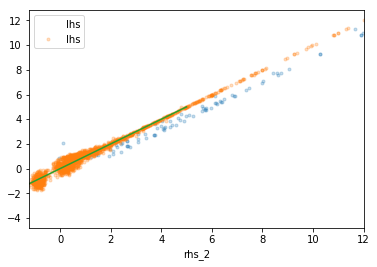

100


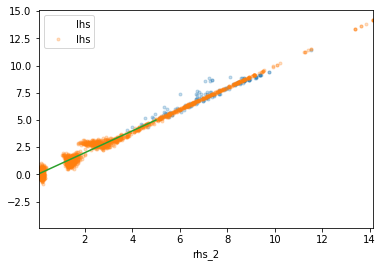

1000


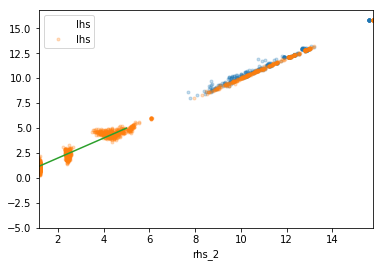

In [564]:
# initial levels (N)
N = 20000
log_level_0 = pd.DataFrame(np.zeros(N), columns = ['level_0']) 
# this represent eg. sales in logs

# time steps (T - 1) timesteps for an N x T dataframe
T = 100
for n in [10, 100, 1000]:
    print(n)
    lhs = []
    rhs = []
    rhs_2 = []
    for sigma in [0.03, 0.1, 0.3, 1]:

        eps = pd.DataFrame(np.random.normal(0, 1, (N, T - 1)), columns = range(1, T))

        # LEAVING THE SHOCKS LINEAR
        shocks = 1 + sigma*eps
        lin_level_0 = pd.DataFrame(np.ones(N), columns = ['level_0']) 
        data = pd.DataFrame(pd.concat([lin_level_0, shocks], axis = 1))
        levels= data.cumprod(axis = 1)

        M = 400
        for m in range(M):
            sample = levels.sample(n)
            lhs += [sample.sum().var()]
            rhs += [sum(sample.var(1)) #* (sample.sum(1)/sample.sum().sum())**2) 
                   - sample.cov().sum().sum() + np.diag(sample.cov()).sum()]
            rhs_2 += [sum(sample.var(1))]

    fig, ax = plt.subplots(1, figsize = (6, 4))
    df = np.log10(pd.DataFrame([rhs, rhs_2, lhs], index = ['rhs', 'rhs_2', 'lhs']).T)
    df.plot('rhs', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .25)
    df.plot('rhs_2', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .25)
    plt.plot( [-4,5],[-4,5] )
    plt.show()

10


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


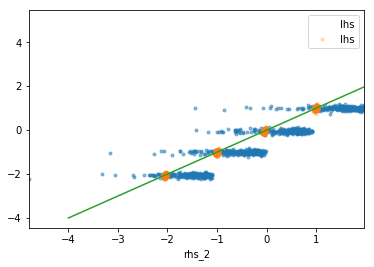

100


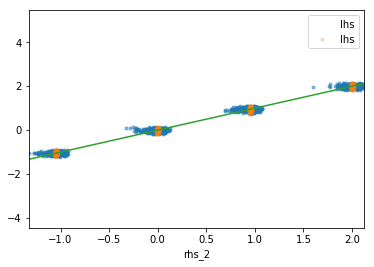

1000


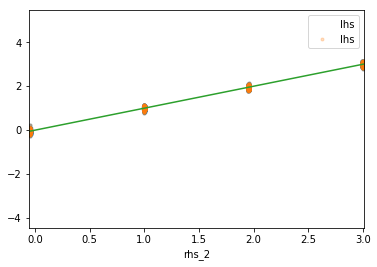

In [562]:
# initial levels (N)
N = 20000
log_level_0 = pd.DataFrame(np.zeros(N), columns = ['level_0']) 
# this represent eg. sales in logs

# time steps (T - 1) timesteps for an N x T dataframe
T = 100
for n in [10, 100, 1000]:
    print(n)
    lhs = []
    rhs = []
    rhs_2 = []
    for sigma in [0.03, 0.1, 0.3, 1]:
#         eps = pd.DataFrame(np.random.normal(0, 1, (N, T - 1)), columns = range(1, T))
#         # LEAVING THE SHOCKS LINEAR
#         shocks = 1 + sigma*eps
#         lin_level_0 = pd.DataFrame(np.ones(N), columns = ['level_0']) 
#         data = pd.DataFrame(pd.concat([lin_level_0, shocks], axis = 1))
#         levels= data.cumprod(axis = 1)
        levels = pd.DataFrame(np.random.normal(1, sigma, (N, T)))

        M = 400
        for m in range(M):
            sample = levels.sample(n)
            lhs += [sample.sum().var()]
            rhs += [sum(sample.var(1)) #* (sample.sum(1)/sample.sum().sum())**2) 
                   - sample.cov().sum().sum() + np.diag(sample.cov()).sum()]
            rhs_2 += [sum(sample.var(1))]

    fig, ax = plt.subplots(1, figsize = (6, 4))
    df = np.log10(pd.DataFrame([rhs, rhs_2, lhs], index = ['rhs', 'rhs_2', 'lhs']).T)
    df.plot('rhs', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .5)
    df.plot('rhs_2', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .25)
    plt.plot( [-4,5],[-4,5] )
    plt.show()

In [524]:
sigma = 0.02

eps = pd.DataFrame(np.random.normal(0, 1, (N, T - 1)), columns = range(1, T))

# LEAVING THE SHOCKS LINEAR
shocks = 1 + sigma*eps
lin_level_0 = pd.DataFrame(np.ones(N), columns = ['level_0']) 
data = pd.DataFrame(pd.concat([lin_level_0, shocks], axis = 1))
levels= data.cumprod(axis = 1)

In [549]:
sample = levels.sample(n)
sample = sample

In [550]:
sum(sample.var(1) * (sample.sum(1)/sample.sum().sum())**2)

7.496454031524048e-06

In [551]:
sample.sum().var()

2.2464597797877897

In [552]:
np.diag(sample.cov()).sum()#.sum().sum()

1.885290523150669

In [553]:
sample.cov().sum().sum() + np.diag(sample.cov()).sum()

120.63644131500499

AttributeError: 'float' object has no attribute 'log10'

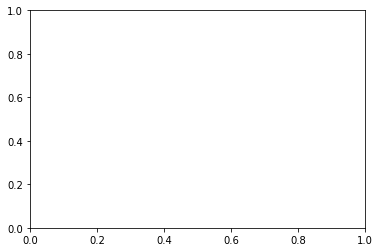

In [489]:
fig, ax = plt.subplots(1, figsize = (6, 4))
df = np.log10(pd.DataFrame([rhs, rhs_2, lhs], index = ['rhs', 'rhs_2', 'lhs']).T)
df.plot('rhs', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .5)
df.plot('rhs_2', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .25)
plt.plot( [-4,5],[-4,5] )
plt.show()

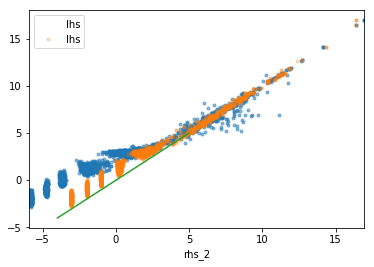

In [438]:
fig, ax = plt.subplots(1, figsize = (6, 4))
df = np.log10(pd.DataFrame([rhs, rhs_2, lhs], index = ['rhs', 'rhs_2', 'lhs']).T)
df.plot('rhs', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .5)
df.plot('rhs_2', 'lhs', marker = '.', lw = 0, ax = ax, alpha = .25)
plt.plot( [-4,5],[-4,5] )
plt.show()
# plt.xlim(0, 1e-2)
# plt.ylim(0, 1e-2)
# plt.xscale('log')
# plt.yscale('log')

## Dependence with N

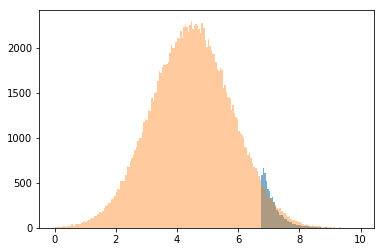

In [10]:
# This is the 'Power law' relation in the upper tail, fitted to empirical observation.
# It has 90% of the value, although only large firms.
# we can see what is the decay, although in our dataset, n is about 6000, no more. 
# Still firm, year grouping can upgrade this x15

bins_ = np.arange(0, 10, .05)

z_0 = -1.1771
value_qs_1 = 6.761

pareto = np.log10(np.random.pareto(-z_0, 6000) + 1 ) + value_qs_1

plt.hist(pareto, bins_, alpha = .6)

mu = 4.47044
sigma = 1.315

advised_size = len(pareto)/(1 - 0.959614)
# (lognormal > min(pareto)).sum() # ~6000 = len(pareto)

lognormal = np.random.normal(mu, sigma, 148566)

plt.hist(lognormal, bins_, alpha = .4)

plt.show()

In [11]:
# What is the decay of GDP volatility with increasing n?

def empirical_pareto_draw(n, z_0 = -1.1771, value_qs_1 = 6.761):
    return np.log10(np.random.pareto(-z_0, n) + 1 ) + value_qs_1

def empirical_lognormal_draw(n, mu = 4.47044, sigma = 1.315):
    return np.random.normal(mu, sigma, n)

def n_corrected_lognormal_draw(n, mu = 4.47044, sigma = 1.315):
    array = np.random.normal(mu, sigma, n)
    return sorted(array)[-round(n*len(pareto)/len(lognormal)):]

# for linear fits
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

## Test of Gabaix decay proposition

In [19]:
N = np.power(5, np.arange(3, 8.5, .5)).round(-1)
print(N)

df_list = []
zs = [-1.1771, -1, -1.5, -2]
for i, z_0 in enumerate(zs):#, Pareto12]:
    print(z_0)
    s_m_vals = []
    # time steps (T - 1) timesteps for an n x T dataframe
    sigma_N = []
    for n in N:
        print(n)
        n = int(n)

        log_level_0 = pd.DataFrame(empirical_pareto_draw(n, z_0), columns = ['level_0']) 
        
        T = 20
        sigma = 0.3 # Empirical log diff growth
        
        s_m = []
        for m in range(100):  
            #Create the shocks
            eps = pd.DataFrame(np.random.normal(0, sigma, (n, T - 1)), columns = range(1, T))
            log_shocks = np.log10(1 + sigma*eps)
            
            data = pd.DataFrame(pd.concat([log_level_0, log_shocks], axis = 1))
            data.columns = range(T)

            # simulate time evolution
            log_levels = data.cumsum(axis = 1)
            levels= np.power(10, log_levels) # S
            Y_levels = levels.sum() # GDP
            GDP_g = (Y_levels.diff() / Y_levels.shift()) # This is DY(t+1)/Y(t)

            s_m += [GDP_g.std()]

        s_m_vals += [s_m]
    df_list += [pd.DataFrame(s_m_vals, index = 
                  pd.MultiIndex.from_product([[str(z_0)], N], names=['distrib', 'N']))]
    
df = pd.concat(df_list)

result = df.T.describe().T

[1.2000e+02 2.8000e+02 6.2000e+02 1.4000e+03 3.1200e+03 6.9900e+03
 1.5620e+04 3.4940e+04 7.8120e+04 1.7469e+05 3.9062e+05]
-1.1771
120.0
280.0
620.0
1400.0
3120.0
6990.0
15620.0
34940.0
78120.0
174690.0
390620.0
-1
120.0
280.0
620.0
1400.0
3120.0
6990.0
15620.0
34940.0
78120.0
174690.0
390620.0
-1.5
120.0
280.0
620.0
1400.0
3120.0
6990.0
15620.0
34940.0
78120.0
174690.0
390620.0
-2
120.0
280.0
620.0
1400.0
3120.0
6990.0
15620.0
34940.0
78120.0
174690.0
390620.0


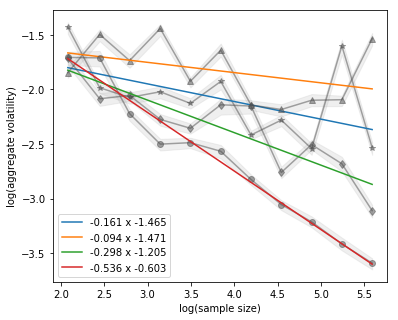

In [21]:
fig, ax = plt.subplots(1, figsize = (6, 5))

for i, distrib in enumerate([str(z_0) for z_0 in zs]):
    r = result.loc[distrib]
    x = np.log10(r.index)
    ax.fill_between(x, np.log10(r['25%']), np.log10(r['75%']), color = '.7', alpha = .2)
    ax.plot(x, np.log10(r['mean']), marker = ['*', '^', 'd', 'o'][i], c = '.3', alpha = .5, label='_')

    popt, pcov = curve_fit(func, x, np.log10(r['mean']))
    ax.plot(x, func(x, *popt), label='%5.3f x %5.3f' % tuple(popt))
    ax.legend()
    
ax.set_xlabel('log(sample size)')
ax.set_ylabel('log(aggregate volatility)')


plt.show()

In [ ]:
# Check:  use log shocks and (1 + e) shocks

## Empirically observed

In [25]:
N = np.power(5, np.arange(3, 8.5, .5)).round(-1)
print(N)

df_list = []
for i, draw_fun in enumerate([empirical_lognormal_draw, empirical_pareto_draw, n_corrected_lognormal_draw]):#, Pareto12]:
    s_m_vals = []
    # time steps (T - 1) timesteps for an n x T dataframe
    sigma_N = []
    for n in N:
        n = int(n)

        log_level_0 = pd.DataFrame(draw_fun(n), columns = ['level_0']) 
        
        T = 20
        sigma = 0.3 # Empirical log diff growth
        
        s_m = []
        for m in range(100):     
            #Create the shocks
            log_shocks = pd.DataFrame(np.random.normal(0, sigma, (n, T - 1)), columns = range(1, T))
#             eps = pd.DataFrame(np.random.normal(0, sigma, (n, T - 1)), columns = range(1, T))
#             log_shocks = np.log10(1 + sigma*eps)
            
            data = pd.DataFrame(pd.concat([log_level_0, log_shocks], axis = 1))
            data.columns = range(T)

            # simulate time evolution
            log_levels = data.cumsum(axis = 1)
            levels= np.power(10, log_levels) # S
            Y_levels = levels.sum() # GDP
            GDP_g = (Y_levels.diff() / Y_levels.shift()) # This is DY(t+1)/Y(t)

            s_m += [GDP_g.std()]

        s_m_vals += [s_m]
    df_list += [pd.DataFrame(s_m_vals, index = 
                  pd.MultiIndex.from_product([[['log_normal', 'pareto', 'lognormal_corr'][i]], N], names=['distrib', 'N']))]
    
df = pd.concat(df_list)

result = df.T.describe().T

[1.2000e+02 2.8000e+02 6.2000e+02 1.4000e+03 3.1200e+03 6.9900e+03
 1.5620e+04 3.4940e+04 7.8120e+04 1.7469e+05 3.9062e+05]


In [45]:
log_shocks = pd.DataFrame(np.random.normal(0, sigma, (n, T - 1)), columns = range(1, T))
log_shocks.head()
log_shocks.head().std(1)

0    0.364394
1    0.315936
2    0.281925
3    0.337365
4    0.356786
dtype: float64

In [47]:
eps = pd.DataFrame(np.random.normal(0, sigma, (n, T - 1)), columns = range(1, T))
log_shocks = np.log10(1 + sigma*eps)
log_shocks.head().std(1)

0    0.032766
1    0.037729
2    0.041698
3    0.038661
4    0.033764
dtype: float64

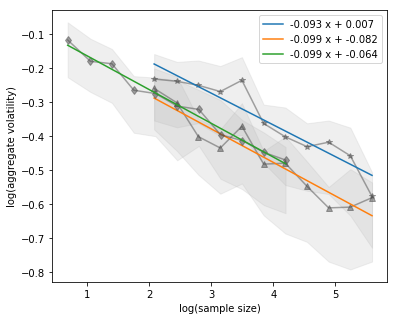

In [27]:
fig, ax = plt.subplots(1, figsize = (6, 5))

for i, distrib in enumerate(['log_normal', 'pareto', 'lognormal_corr']):
    r = result.loc[distrib]
    r.index = r.index/[1, 1, len(lognormal)/len(pareto)][i]
    x = np.log10(r.index)
    ax.fill_between(x, np.log10(r['25%']), np.log10(r['75%']), color = '.7', alpha = .2)
    ax.plot(x, np.log10(r['mean']), marker = ['*', '^', 'd'][i], c = '.3', alpha = .5, label = '_')

    popt, pcov = curve_fit(func, x, np.log10(r['mean']))
    ax.plot(x, func(x, *popt), label='%5.3f x + %5.3f' % tuple(popt))
    ax.legend()
    
ax.set_xlabel('log(sample size)')
ax.set_ylabel('log(aggregate volatility)')


plt.show()

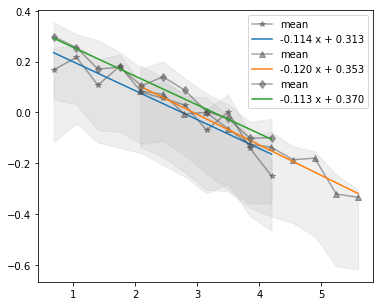

In [24]:
xx

1.9952623149688795

In [ ]:
# initial levels (N)
sigma_N = []
N = np.power(5, np.arange(2, 8, .25)).round(-1)
print(N)
    
result = []
for n in N:
    n = int(n)
    # Lognormal
    Lognormal_0 = pd.DataFrame(random.normal(5, 1, n), columns = ['level_0']) 

    # Normal
    level_0 = pd.DataFrame(random.normal(5000, 1000, n), columns = ['level_0']) 
    Normal_0 = np.log10(level_0)
    
#     # Pareto 3, 2
#     a, m = 1.5, 2.  # shape and mode
#     level_0 = pd.DataFrame((random.pareto(a, n) + 1) * m, columns = ['level_0']) 
#     Pareto12 = np.log10(level_0)
    
#     # Pareto 3, 2
#     a, m = 2.5, 2.  # shape and mode
#     level_0 = pd.DataFrame((random.pareto(a, n) + 1) * m, columns = ['level_0']) 
#     Pareto52 = np.log10(level_0)

#     # Pareto 3, 2
#     a, m = 1.5, 4.  # shape and mode
#     level_0 = pd.DataFrame((random.pareto(a, n) + 1) * m, columns = ['level_0']) 
#     Pareto54 = np.log10(level_0)
    
    sigma_N = []
    for log_level_0 in [Lognormal_0, Normal_0]:#, Pareto12, Pareto52, Pareto54]:
        # time steps (T - 1) timesteps for an n x T dataframe
        T = 150
        sigma = .2
        eps = pd.DataFrame(np.random.normal(0, sigma, (n, T - 1)), columns = range(1, T))
        log_shocks = np.log10(1 + sigma*eps)

        data = pd.DataFrame(pd.concat([log_level_0, log_shocks], axis = 1))
        data.columns = range(T)
        log_levels = data.cumsum(axis = 1)

        # S
        levels= np.power(10, log_levels)

        # GDP
        Y_levels = levels.sum()

        # This is DY(t+1)/Y(t)
        GDP_g = (Y_levels.diff() / Y_levels.shift())#.std() #lhs

        sigma_N += [GDP_g.std()]
    result += [sigma_N]

result = np.array(result).T

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(N, np.array(result[0]), marker = 'o')
plt.plot(N, np.array(result[1]), marker = '*')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(N, np.array(result[0]), marker = 'o')
plt.plot(N, np.array(result[1]), marker = '*')
plt.plot(N, np.array(result[2]), marker = '^')
plt.plot(N, np.array(result[3]), marker = '.')
plt.plot(N, np.array(result[4]), marker = 'd')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
    for name in varnames_list:
        res = add_entry(vardict, *name)

    f = open("variables.json","w")
    f.write(json.dumps(res))
    f.close()

## Empirical, actual data

In [ ]:
df = pd.read_csv('./../../data/processed/ID_YM.csv')
df = df.groupby(['ID', 'IMPORT', 'YEAR'])[['VART']].sum().reset_index()

In [ ]:
df_table = df.groupby(['ID', 'IMPORT', 'YEAR'])[['VART']].sum().unstack()
df_table = df_table.loc[df_table.count(1) > 10]

In [ ]:
sigma_N = []
N = np.power(5, np.arange(2.25, 6, .25)).round(-1)
print(N)
s_m_vals = []
result = []
for i in [0, 1]:# Exports, Imports

    df_table_i = df_table.loc[df_table.index.get_level_values(1) == 0]
    df_table_i = df_table_i.interpolate(axis = 1)
    sigma_N = []
    for n in N:
        n = int(n)

        s_m = []
        for m in range(100):
#             if n > 1000: m = 20 # nonsense
            levels = df_table_i.sample(n, replace = True)
            # GDP
            Y_levels = levels.sum()
            # This is DY(t+1)/Y(t)
            GDP_g = (Y_levels.diff() / Y_levels.shift())#.std() #lhs
            s_m += [GDP_g.std()]

        s_m = np.array(s_m)
        s_m_vals += [s_m]
#         print(np.quantile(s_m, .25), np.mean(s_m), np.quantile(s_m, .75))
        sigma_N += [np.mean(s_m)]
    result += [sigma_N]

result = np.array(result) #.T

In [ ]:
plt.plot(N, np.array(result[0]), marker = 'o')
plt.plot(N, np.array(result[1]), marker = '*')
plt.xscale('log')
plt.yscale('log')

plt.axvline(len(df_table_i), c = 'k')

plt.show()

In [ ]:
plt.plot(N, np.array(result[0]), marker = 'o')
plt.plot(N, np.array(result[1]), marker = '*')
plt.xscale('log')
plt.yscale('log')

plt.axvline(len(df_table_i), c = 'k')
plt.plot([10,10000],[.5,.05], c = 'k')

plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = (12, 6))
pd.DataFrame(np.array(s_m_vals)).T.describe().T[['mean','min','25%','50%','75%','max']].plot(marker = '.', ax = ax)
# plt.xscale('log')
ax.set_yscale('log')
plt.show()